In [1]:
import librosa

# Cargar archivos .ogg
audio_files = ["audio_lily.ogg", "audio_walter.ogg", "audio_walter_2.ogg"]
audios = []
sample_rates = []

for file in audio_files:
    y, sr = librosa.load(file, sr=None)  # sr=None mantiene la frecuencia de muestreo original
    audios.append(y)
    sample_rates.append(sr)

# Normalizar frecuencia de muestreo (opcional)
target_sr = 22050  # Frecuencia de muestreo común
audios = [librosa.resample(y, orig_sr=sr, target_sr=target_sr) for y, sr in zip(audios, sample_rates)]

C:\Users\USER\anaconda33\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [2]:
from IPython.display import Audio

for i, audio in enumerate(audios):
    print(f"Audio {i+1}:")
    display(Audio(audio, rate=target_sr))

Audio 1:


Audio 2:


Audio 3:


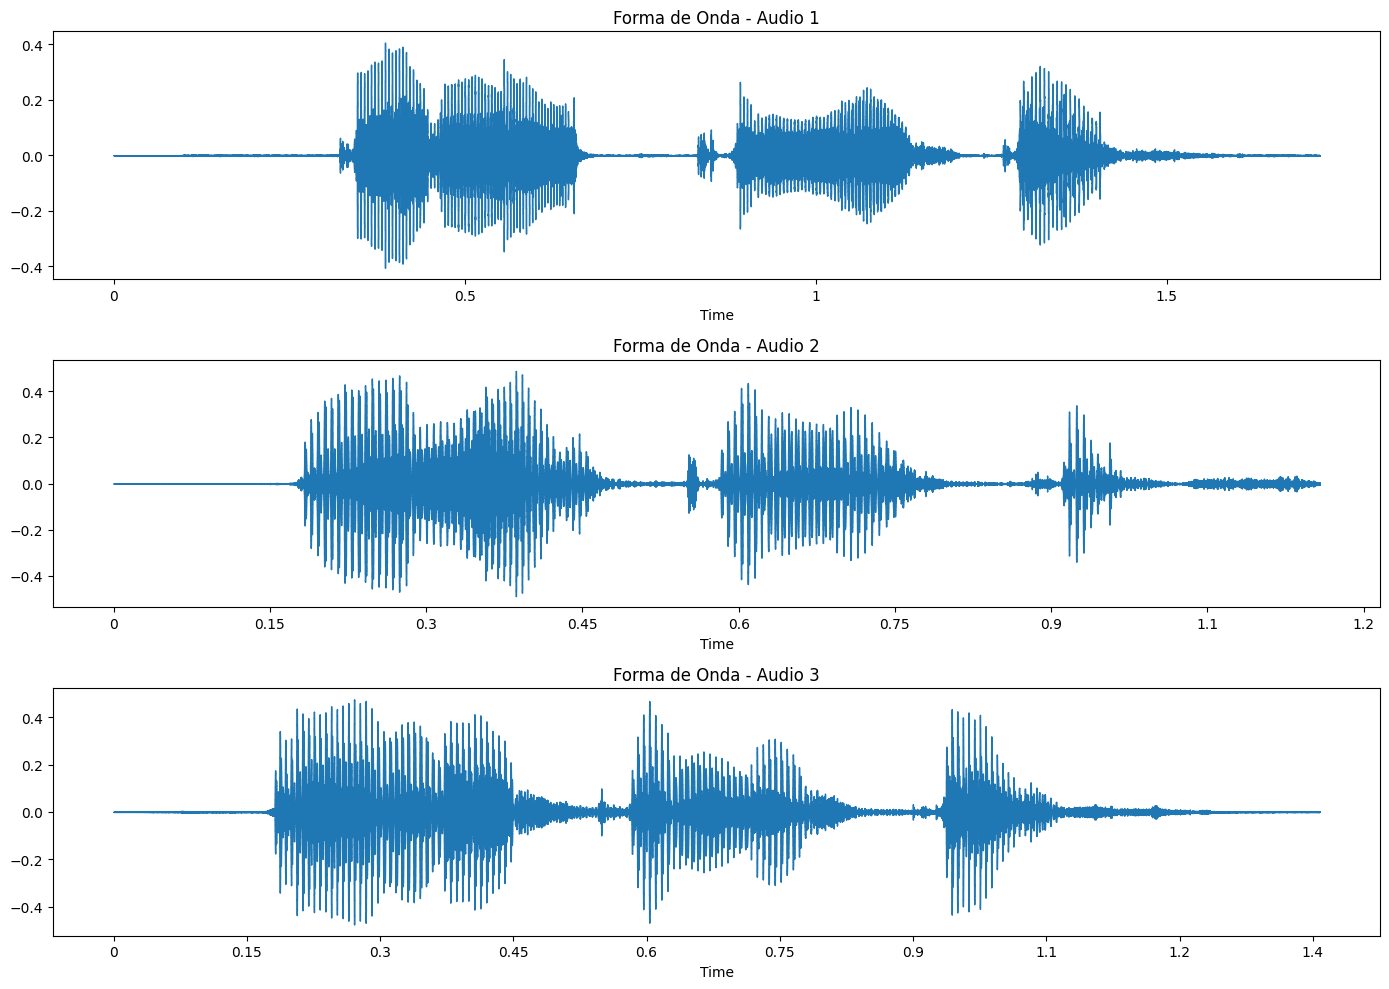

In [3]:
import matplotlib.pyplot as plt

# Visualizar formas de onda
plt.figure(figsize=(14, 10))
for i, audio in enumerate(audios):
    plt.subplot(len(audios), 1, i+1)
    librosa.display.waveshow(audio, sr=target_sr)
    plt.title(f"Forma de Onda - Audio {i+1}")
plt.tight_layout()
plt.show()

In [4]:
# Normalizar frecuencia de muestreo
target_sr = 22050
audios = [librosa.resample(y, orig_sr=sr, target_sr=target_sr) for y, sr in zip(audios, sample_rates)]

for i, audio in enumerate(audios):
    print(f"Audio {i+1}:")
    display(Audio(audio, rate=target_sr))

Audio 1:


Audio 2:


Audio 3:


In [5]:
mfccs = [librosa.feature.mfcc(y=audio, sr=target_sr, n_mfcc=13) for audio in audios]

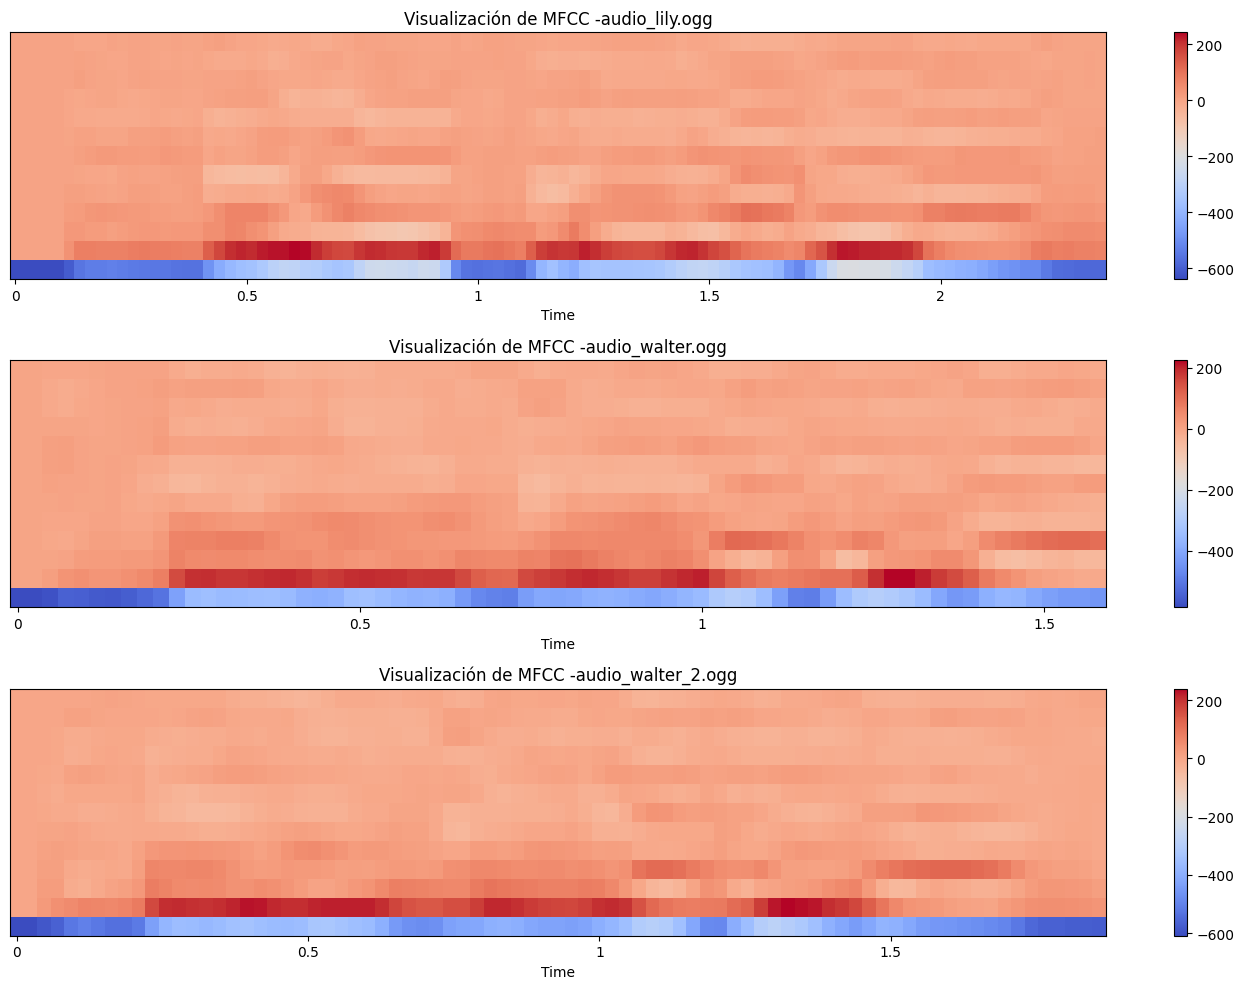

In [6]:
# Visualizar MFCCs
plt.figure(figsize=(14, 10))
for i, mfcc in enumerate(mfccs):
    plt.subplot(len(mfccs), 1, i+1)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.colorbar()
    plt.title(f"Visualización de MFCC -{audio_files[i]}")
plt.tight_layout()
plt.show()

In [7]:
import numpy as np

# Comparar audios
def compare_mfccs(mfcc1, mfcc2):
    return np.mean(np.abs(mfcc1 - mfcc2))

In [8]:
# Calcular la media de los MFCCs a lo largo del tiempo
mfccs_mean = [np.mean(mfcc, axis=1) for mfcc in mfccs]

for i in range(len(mfccs_mean)):
    for j in range(i+1, len(mfccs_mean)):
        difference = compare_mfccs(mfccs_mean[i], mfccs_mean[j])
        print(f"Diferencia media entre Audio {i+1} y Audio {j+1}: {difference:.2f}")

Diferencia media entre Audio 1 y Audio 2: 12.28
Diferencia media entre Audio 1 y Audio 3: 10.90
Diferencia media entre Audio 2 y Audio 3: 4.54


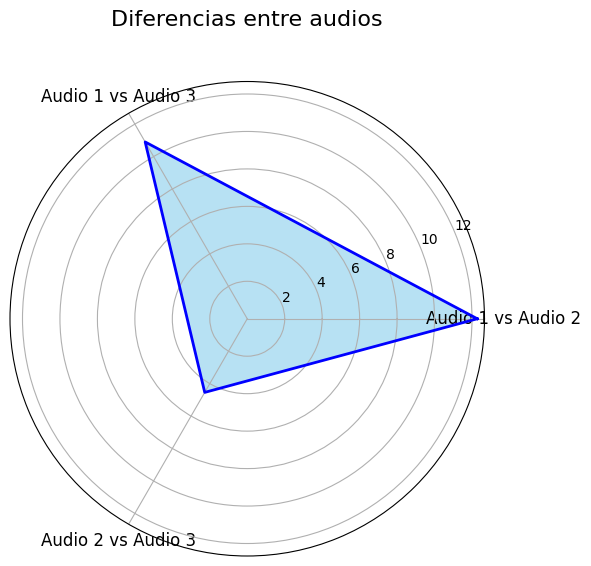

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de diferencias
differences = [12.28, 10.90, 4.54] # asigne los valores manualmente
labels = ["Audio 1 vs Audio 2", "Audio 1 vs Audio 3", "Audio 2 vs Audio 3"]

# Ángulos para el gráfico de radar
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Cerrar el círculo

# Cerrar los datos
differences += differences[:1]

# Crear el gráfico de radar
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, differences, color='skyblue', alpha=0.6)
ax.plot(angles, differences, color='blue', linewidth=2)

# Añadir etiquetas
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)

# Añadir título
plt.title('Diferencias entre audios', fontsize=16, y=1.1)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

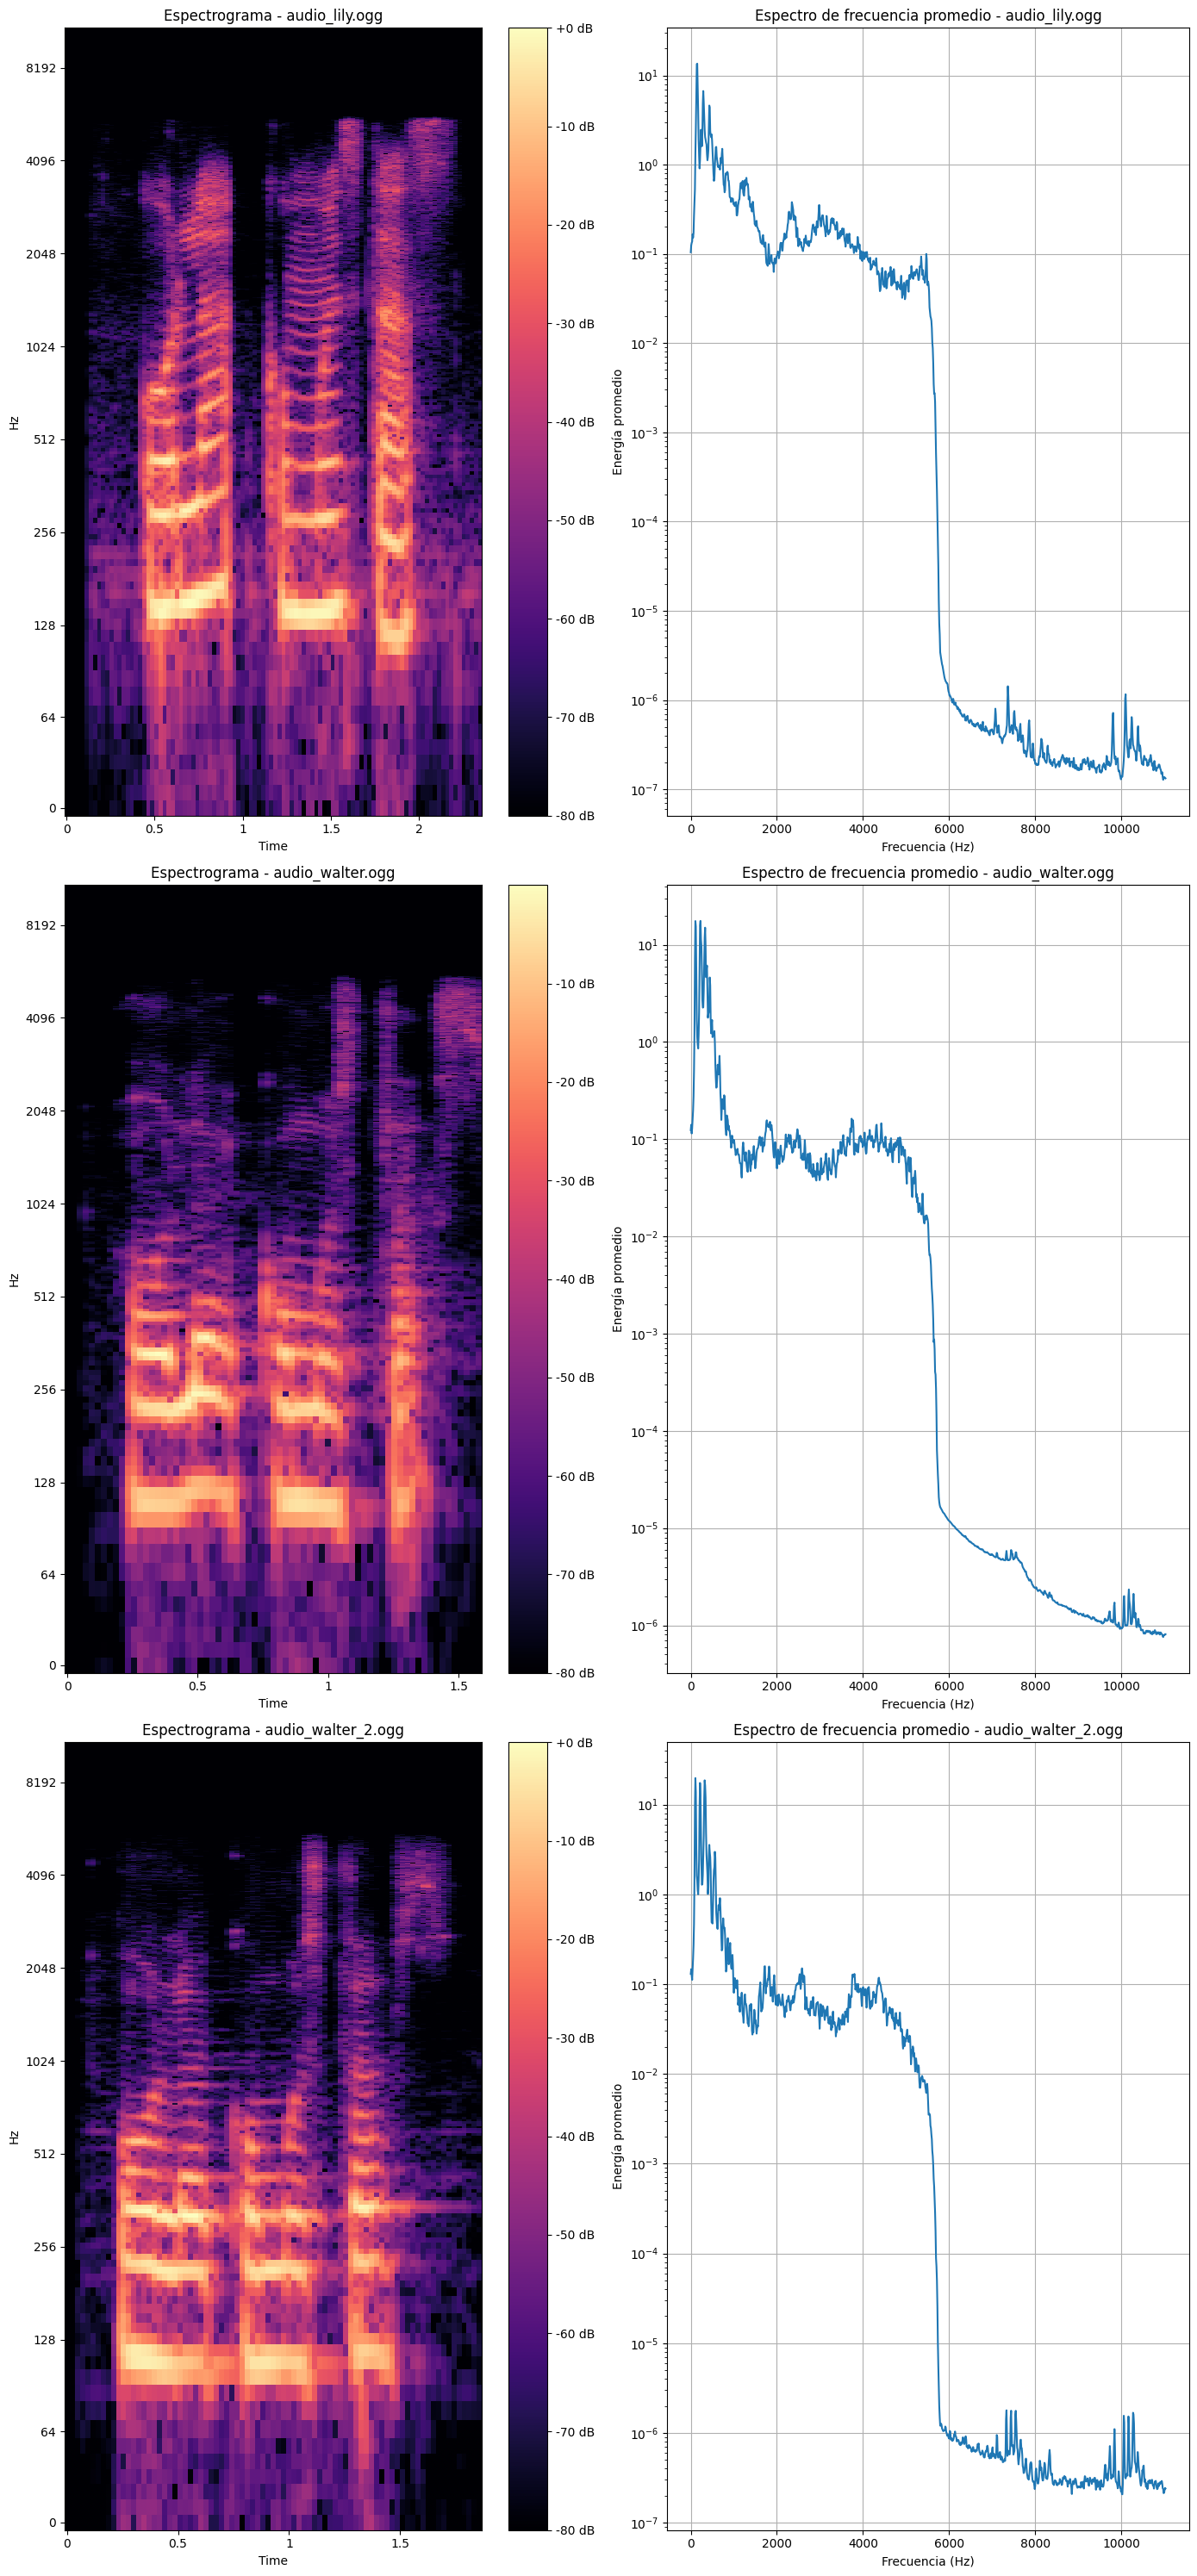

In [10]:
# Visualizar espectrogramas y espectros de frecuencia promedio
plt.figure(figsize=(14, 10 * len(audios)))  # Ajustar el tamaño de la figura

for i, audio in enumerate(audios):
    # Calcular el espectrograma
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    
    # Espectrograma
    plt.subplot(len(audios), 2, 2*i+1)
    librosa.display.specshow(D, sr=target_sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Espectrograma - {audio_files[i]}')

    # Calcular el espectro de frecuencia promedio
    S = np.abs(librosa.stft(audio))
    freqs = librosa.fft_frequencies(sr=target_sr)
    avg_spectrum = np.mean(S, axis=1)
    
    # Espectro de frecuencia promedio
    plt.subplot(len(audios), 2, 2*i+2)
    plt.semilogy(freqs, avg_spectrum)
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Energía promedio')
    plt.title(f'Espectro de frecuencia promedio - {audio_files[i]}')
    plt.grid()

plt.tight_layout()
plt.show()

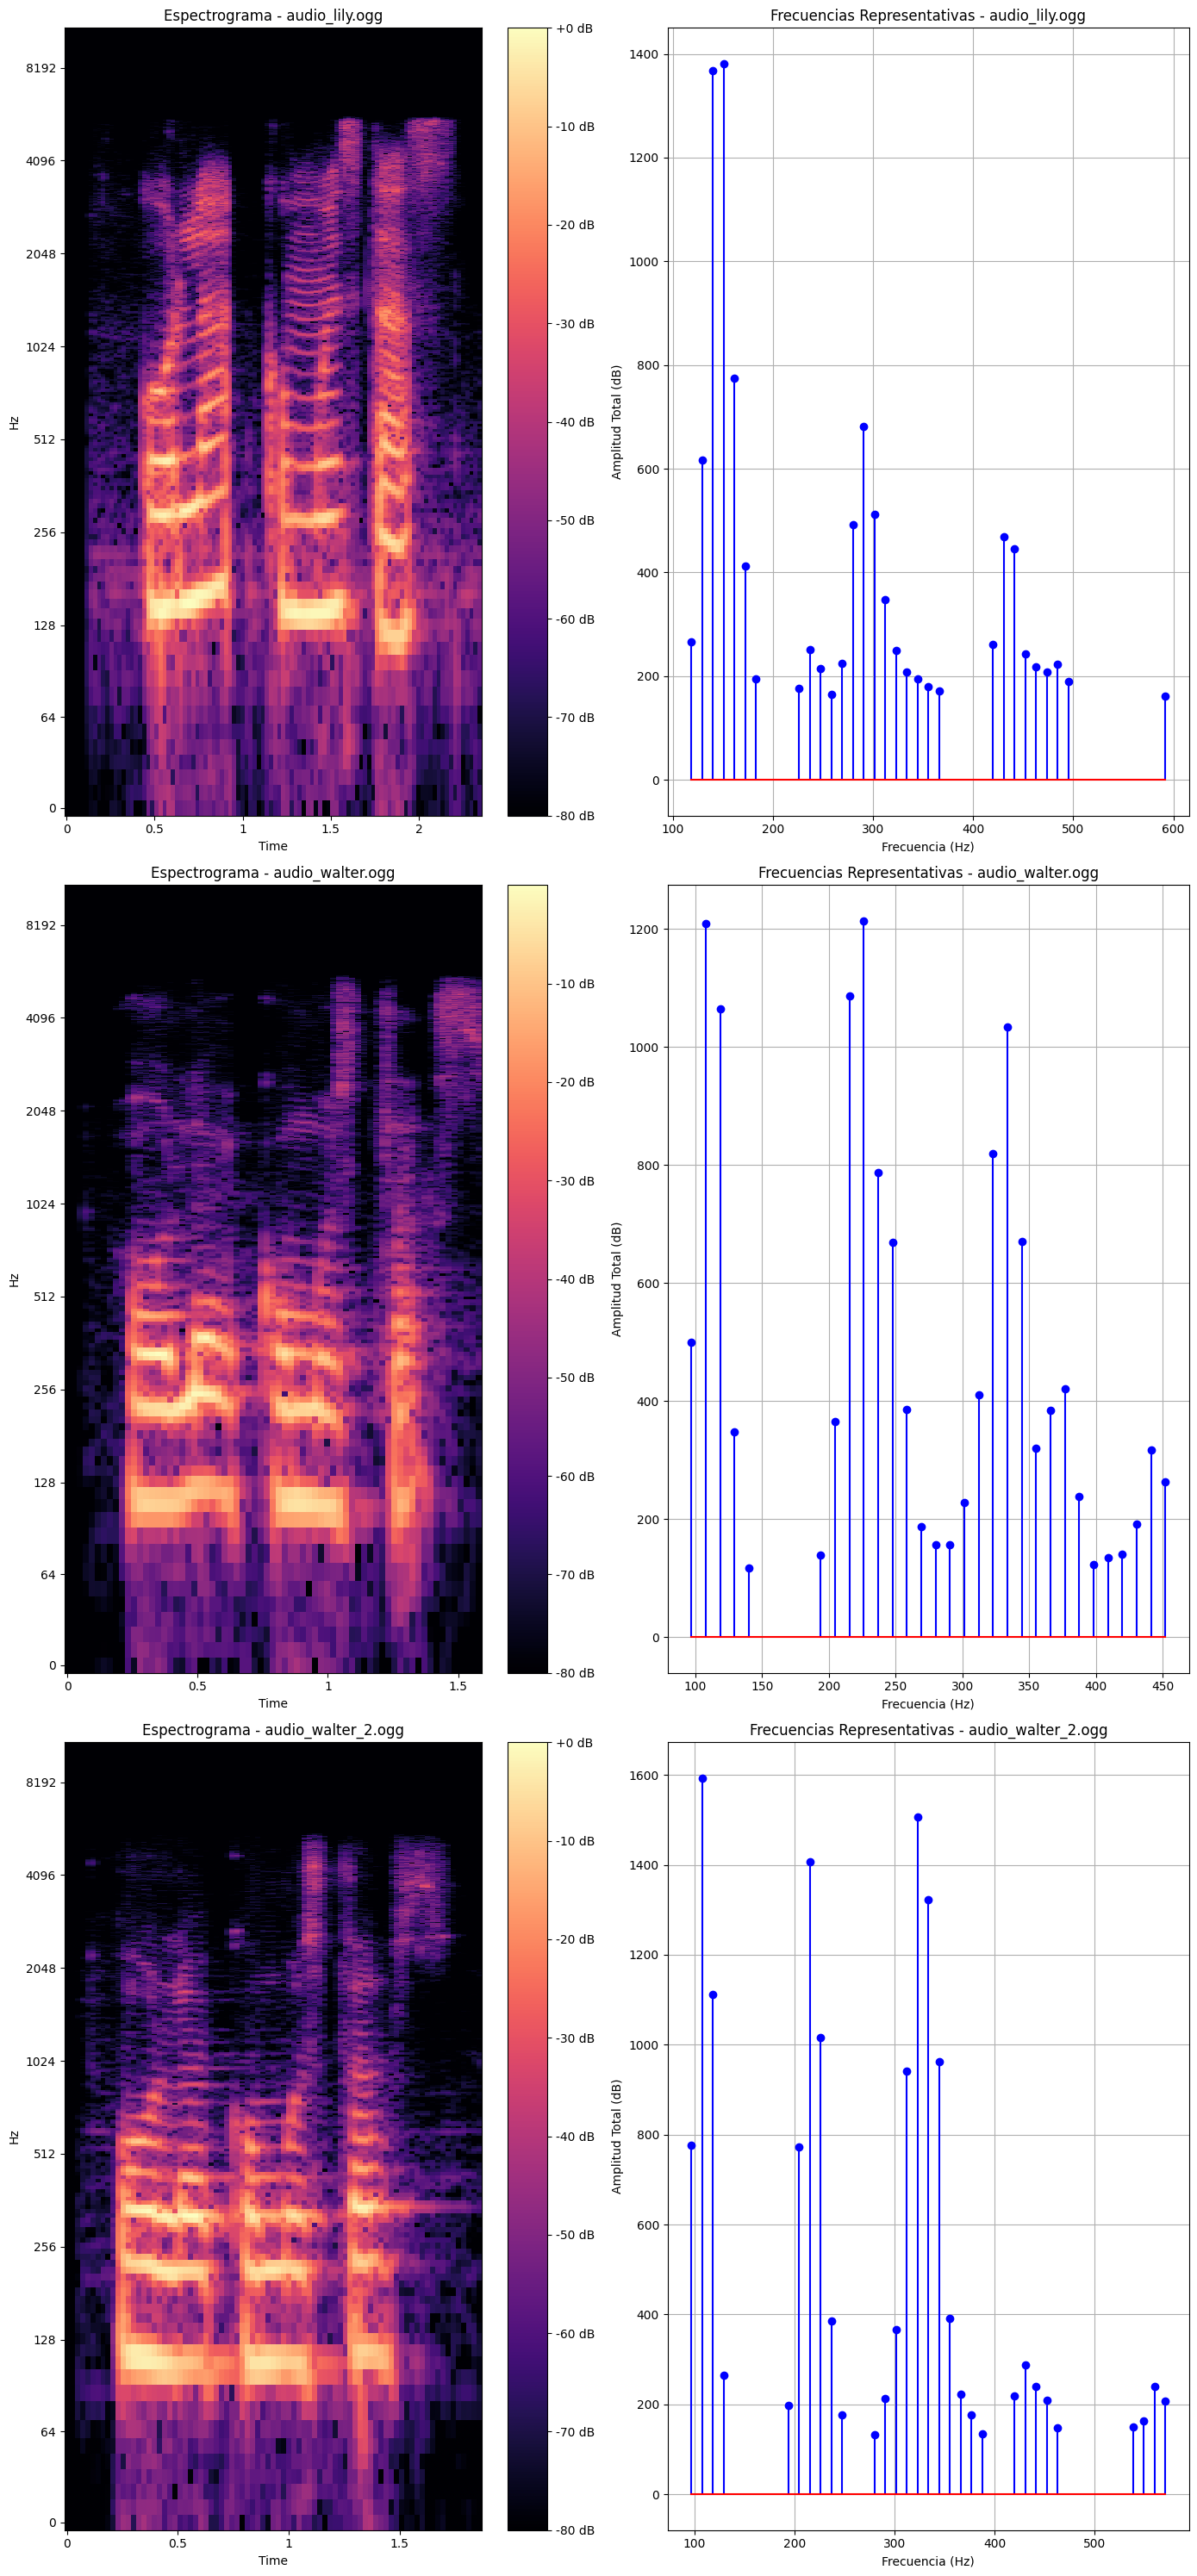

In [11]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Tamaño de la figura
plt.figure(figsize=(14, 10 * len(audios)))

# Para cada archivo de audio
for i, audio in enumerate(audios):
    # Calcular el espectrograma
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    
    # Espectrograma
    plt.subplot(len(audios), 2, 2*i+1)
    librosa.display.specshow(D, sr=target_sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Espectrograma - {audio_files[i]}')

    # Calcular el espectro de frecuencia promedio
    S = np.abs(librosa.stft(audio))
    freqs = librosa.fft_frequencies(sr=target_sr)
    
    # Sumar las amplitudes a lo largo del tiempo para cada frecuencia
    sum_amplitudes = np.sum(S, axis=1)
    
    # Seleccionar las 30 frecuencias más representativas (por ejemplo top 30)
    top_n = 30
    top_indices = np.argsort(sum_amplitudes)[-top_n:][::-1]
    top_frequencies = freqs[top_indices]
    top_amplitudes = sum_amplitudes[top_indices]

    # Graficar las frecuencias representativas como líneas
    plt.subplot(len(audios), 2, 2*i+2)
    plt.stem(top_frequencies, top_amplitudes, linefmt='b-', markerfmt='bo', basefmt='r-')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud Total (dB)')
    plt.title(f'Frecuencias Representativas - {audio_files[i]}')
    plt.grid()

plt.tight_layout()
plt.show()
